In [3]:
import sys
sys.path.append('../')

import torchvision
import torchvision.transforms as transforms

# 데이터셋을 위한 변환(transform) 정의
transform = transforms.Compose([
    transforms.ToTensor(),
])

# CIFAR-10 훈련 데이터셋 로드
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                             download=True, transform=transform)

9913344it [00:02, 3812902.38it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



29696it [00:00, 7126740.95it/s]          

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



1649664it [00:00, 3272712.80it/s]                            


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



5120it [00:00, 32196156.64it/s]         

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw




/Users/shlee/miniforge3/envs/torch19/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-jhk0fkj8/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
import torch
images_only_dataset = [image for image, _ in train_dataset]
dataset = torch.stack(images_only_dataset)

In [12]:
img = dataset[0][0].numpy()
img.shape

(28, 28)

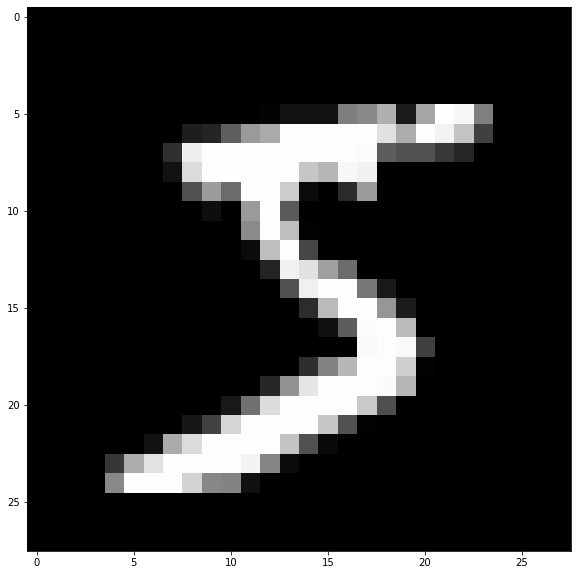

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(img, cmap = 'gray')

In [15]:
import numpy as np
def assign_unique_strict_order_to_pixels(image):
    # Flatten the image and create a list of tuples (intensity, original_index)
    flattened = [(val, idx) for idx, val in enumerate(image.flatten())]

    # Sort based on intensity first, then the original index
    sorted_flattened = sorted(flattened, key=lambda x: (x[0], x[1]))

    # Create an array to store the unique strict order
    unique_strict_order = np.zeros(len(flattened), dtype=int)

    # Assign a unique strict order
    for order, (_, original_index) in enumerate(sorted_flattened, start=1):
        unique_strict_order[original_index] = order

    # Reshape back to the original image shape
    return unique_strict_order.reshape(image.shape)

ordered_img = assign_unique_strict_order_to_pixels(img)

In [17]:
def create_time_series_images(ordered_image, total_steps):
    rows, cols = ordered_image.shape
    time_series_images = np.zeros((rows, cols, total_steps), dtype=np.uint8)

    for step in range(total_steps):
        time_series_images[:, :, step] = (ordered_image <= step + 1).astype(np.uint8)

    return time_series_images

img_series = create_time_series_images(ordered_img, 28*28)

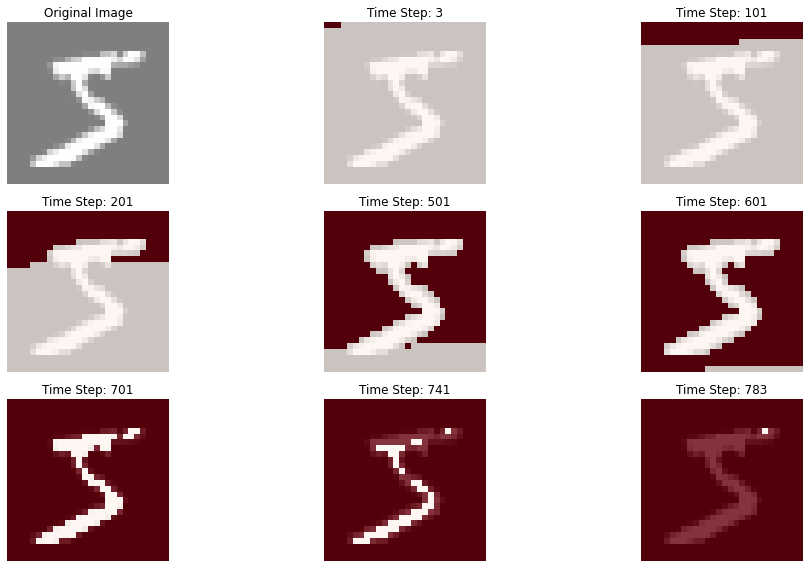

In [40]:
def overlay_original_with_alpha(original_image, time_series_images, steps, alpha=0.5):
    plt.figure(figsize=(15, 8))
    plt.subplot(3, 3, 1)
    plt.imshow(original_image, cmap='gray', alpha=alpha)
    plt.title("Original Image")
    plt.axis('off')

    for i, step in enumerate(steps, start=1):
        if i >= 9:  # Limiting to 9 subplots
            break
        overlaid_image = np.where(time_series_images[:, :, step] == 1, original_image.max(), 0)
        plt.subplot(3, 3, i + 1)
        plt.imshow(original_image, cmap='gray')
        plt.imshow(overlaid_image, cmap='Reds', alpha=0.8)
        plt.title(f"Time Step: {step + 1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

overlay_original_with_alpha(img, img_series, [2, 100, 200, 500, 600, 700, 740, 782], alpha=0.5)

In [30]:
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

def create_gif_from_time_series_fixed(time_series_images, original_image, filename, duration=100, alpha=0.5):
    frames = []
    
    for i in range(time_series_images.shape[2]):
        # Extract the current time step image
        current_step_image = time_series_images[:, :, i]

        # Create an overlay image for the current time step
        highlighted_image = np.where(current_step_image == 1, 255, 0).astype(np.uint8)

        # Convert to PIL Image for both original and highlighted image
        pil_original = Image.fromarray(original_image).convert("RGBA")
        pil_highlighted = Image.fromarray(highlighted_image).convert("RGBA")

        # Apply alpha blending
        blended_image = Image.blend(pil_original, pil_highlighted, alpha=alpha)

        # Convert to RGB and append to frames
        frames.append(blended_image.convert("RGB"))

    # Save the frames as a GIF
    frames[0].save(filename, save_all=True, append_images=frames[1:], optimize=False, duration=duration, loop=0)

# Create a GIF from the time series images
gif = create_gif_from_time_series_fixed(img_series, img, 'test.gif')



In [31]:
gif

In [42]:
import gudhi as gd



TypeError: 'module' object is not callable